In [1]:
import numpy as np
from numpy.fft import fft
from numpy import arange, linspace, sin, pi
import matplotlib.pyplot as plt

In [2]:
def FFT(s):
    # create time samples
    n=s.shape[0]
    dt=1/(44000) ## 44kHz sampling rate
    t=np.linspace(0,n-1,n)*dt
    
    # Fourier transformed
    f=np.fft.fftfreq(n,dt)
    y=np.fft.fft(s)
    
    return(f,y)

In [3]:
# load data
s1 = np.loadtxt("../data/sensor1Data.txt", skiprows=1, delimiter="\n", unpack=False)
s2 = np.loadtxt("../data/sensor2Data.txt", skiprows=1, delimiter="\n", unpack=False)


# Playing with FFT'd data

A simple example:
* A sinusoidal signal is recorded for 10 minutes (600 seconds)
* Sampling rate is eight times per second

Simple facts:
* The period is: 2*pi seconds
* The frequency is 1/2*pi ~ 0.159 

In [4]:
# construct signal in time-space
x=np.linspace(0,600,4800)
y=np.sin(x)

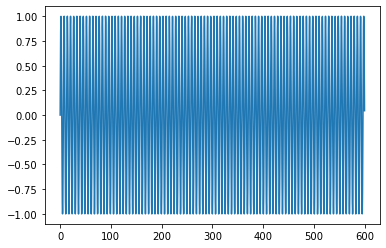

In [5]:
plt.plot(x,y)

In [6]:
# create signal is frequency space (see docs https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq)
n = x.shape[0]   # size of signal
d = (600-0)/4800 # time spacing between signal
f=np.fft.fftfreq(n,d)

In [7]:
# get FFT
ffty = np.fft.fft(y)

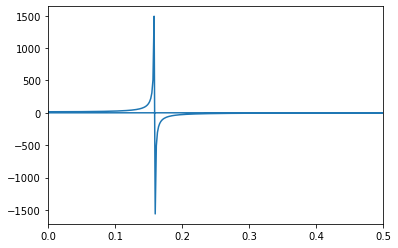

In [8]:
plt.plot(f, ffty.real)
plt.xlim([0,0.5]) 
plt.show()

Example: more peaks

In [9]:
# create signal is frequency space (see docs https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq)
n = x.shape[0]   # size of signal
d = (600-0)/4800 # time spacing between signal
f=np.fft.fftfreq(n,d)

In [10]:
# get FFT
ffty = np.fft.fft(y)

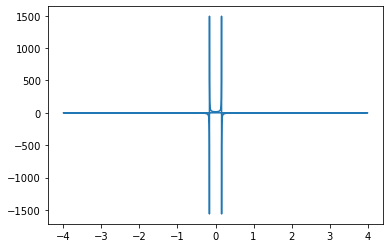

In [11]:
plt.plot(f, ffty.real)
# plt.xlim([0,0.5]) 
plt.show()

# Worksheet tasks and background

* Correlation is measurement of the similarity between two signals/sequences.
* Convolution is measurement of effect of one signal on the other signal.

Turns out, the output of a convolution between two sequences is the same as the correlation when one of the signals is reversed. 

Steps:

1. FFT one signal
2. Take complex conjugate of one signal
3. Perform elementwise multiplication
4. Take inverse FFT
5. Repeat and find max

Useful background:
* [Convolution via frequency domain multiplication](https://www.youtube.com/watch?v=4TTpwIZrUAo)
* [Convolution in the time domain](https://www.youtube.com/watch?v=HSMwxBg7iq4)


Wikipedia: The term convolution refers to both the result function and to the process of computing it. It is defined as the integral of the product of the two functions after one is reversed and shifted. 

## Simple convolution

In [12]:
# construct signal in time-space
x=np.linspace(0,600,4800)
s=np.sin(x)
s_shifted=np.sin(x+pi/2)

(0.0, 30.0)

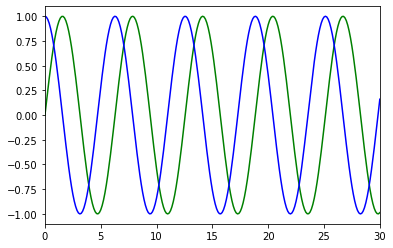

In [13]:
plt.plot(x,s,c='g')
plt.plot(x,s_shifted,c='b')
plt.xlim([0,30])

In [14]:
# take FFT
f, y=FFT(s)
f_sh, y_sh=FFT(s_shifted)
print(f'fy: {f.shape} {y.shape} shifted fy: {f_sh.shape} {y_sh.shape}')

fy: (4800,) (4800,) shifted fy: (4800,) (4800,)


(0.0, 1100.0)

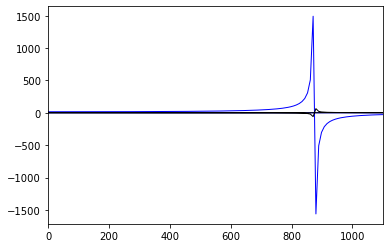

In [15]:
# plot real part
plt.plot(f, y.real, linewidth=1, c='b')
plt.plot(f_sh, y_sh.real, linewidth=1, c='black')
plt.xlim([0,1100])
# plt.ylim([-400,400])

(0.0, 1100.0)

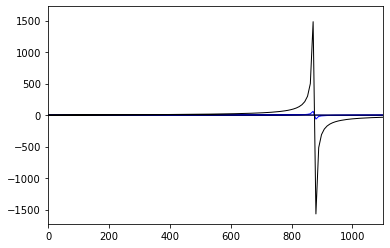

In [16]:
# plot imaginary part
plt.plot(f, y.imag, linewidth=1, c='b')
plt.plot(f_sh, y_sh.imag, linewidth=1, c='black')
plt.xlim([0,1100])
# plt.ylim([-400,400])

(800.0, 1000.0)

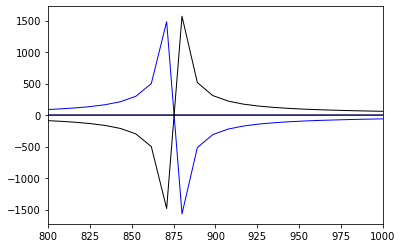

In [17]:
# take complex conjugate of one signal:
y_sh_conj=np.conj(y_sh)
# plot imaginary part
plt.plot(f_sh, y_sh.imag, linewidth=1, c='b')
plt.plot(f_sh, y_sh_conj.imag, linewidth=1, c='black')
plt.xlim([800,1000])

(0.0, 1000.0)

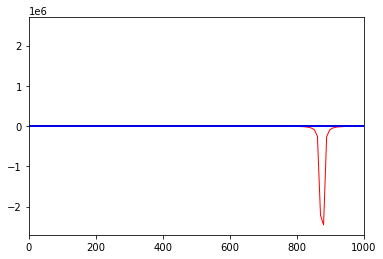

In [18]:
mult=y*y_sh_conj
# plt.plot(f, mult.real, linewidth=1, c='b')
plt.plot(f, mult.imag, linewidth=1, c='r')
plt.plot(f, y.imag, linewidth=1, c='black')
plt.plot(f, y_sh.imag, linewidth=1, c='b')
plt.xlim([0,1000])

(0.0, 1000.0)

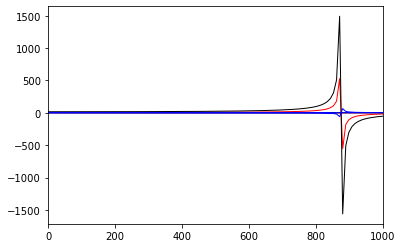

In [19]:
# plt.plot(f, mult.real, linewidth=1, c='b')
plt.plot(f, mult.real, linewidth=1, c='r')
plt.plot(f, y.real, linewidth=1, c='black')
plt.plot(f, y_sh.real, linewidth=1, c='b')
plt.xlim([0,1000])

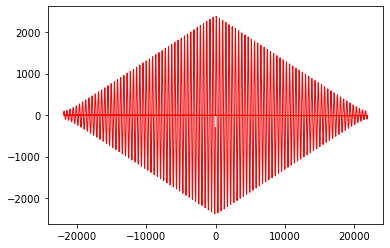

In [20]:
# take inverse FFT of result
inv=np.fft.ifft(mult)
plt.plot(f, inv.real, linewidth=1, c='r')

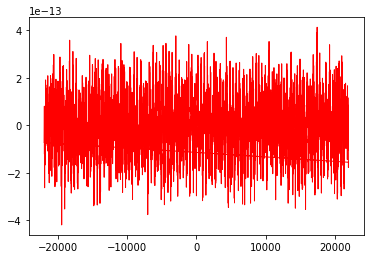

In [21]:
plt.plot(f, inv.imag, linewidth=1, c='r')


## Looking at shifting curve function np.ifftshift

(0.0, 30.0)

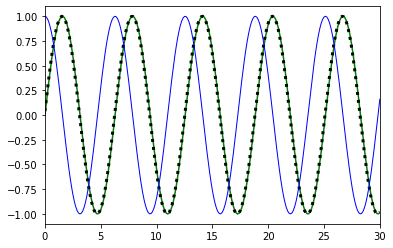

In [22]:
# part of this work involves shifting a curve, lets check out ifftshift in the time domain
s_shift_again=np.fft.ifftshift(s_shifted)
plt.plot(x,s,c='g')
plt.plot(x,s_shift_again, linestyle=':', linewidth=3, c='black')
plt.plot(x,s_shifted, linewidth=1, c='blue')
plt.xlim([0,30])

/Users/mac/anaconda/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/mac/anaconda/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/mac/anaconda/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(100.0, -100.0)

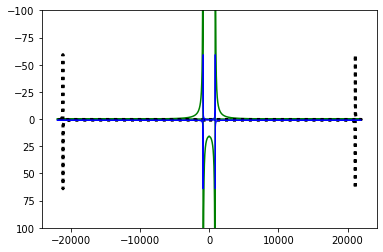

In [23]:
# lets check out ifftshift in the frequency domain
y_sh_again=np.fft.ifftshift(y_sh)
plt.plot(f,y,c='g')
plt.plot(f_sh,y_sh_again, linestyle=':', linewidth=3, c='black')
plt.plot(f_sh,y_sh, linewidth=1, c='blue')
# plt.xlim([0,30])
plt.ylim([100,-100])

/Users/mac/anaconda/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/mac/anaconda/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


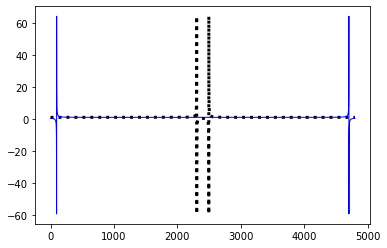

In [24]:
plt.plot(y_sh_again, linestyle=':', linewidth=3, c='black')
plt.plot(y_sh, linewidth=1, c='blue')

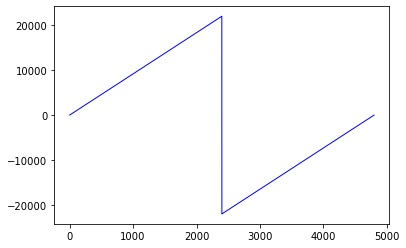

In [25]:
plt.plot(f, linewidth=1, c='blue')

Convolution is "is defined as the integral of the product of the two functions after one is reversed and shifted. And the integral is evaluated for all values of shift, producing the convolution function." (see [Wikipedia](https://en.wikipedia.org/wiki/Convolution#Visual_explanation))

# FFT on signals s1, s2

In [26]:
# create fft samples
f1, y1=FFT(s1)
f2, y2=FFT(s2)

**Plot all real data**

(-400.0, 400.0)

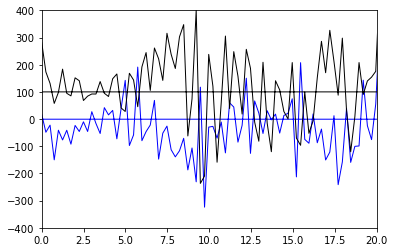

In [27]:
# REAL data
plt.plot(f1, y1.real, linewidth=1, c='b')
plt.plot(f2, y2.real+100, linewidth=1, c='black') # offset for clarity
plt.xlim([0,20])
plt.ylim([-400,400])

**Plot imaginary data**

(-400.0, 400.0)

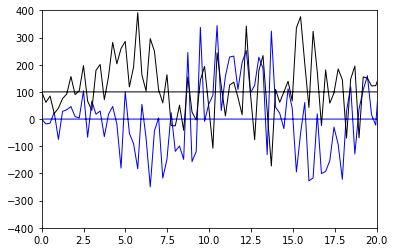

In [28]:
# IMAG data 
plt.plot(f1, y1.imag, linewidth=1, c='b')
plt.plot(f2, y2.imag+100, linewidth=1, c='black') # offset for clarity
plt.xlim([0,20])
plt.ylim([-400,400])

In [29]:
y1.real

array([  17.408473  ,  -48.4180928 ,  -22.24701564, ..., -149.92426592,
        -22.24701564,  -48.4180928 ])

In [30]:
y1.imag

array([-5.68434189e-14, -1.79692602e+01, -1.50515519e+01, ...,
       -2.46906940e+01,  1.50515519e+01,  1.79692602e+01])

**Plot s1 FFT: imaginary and real parts**

(0.0, 100.0)

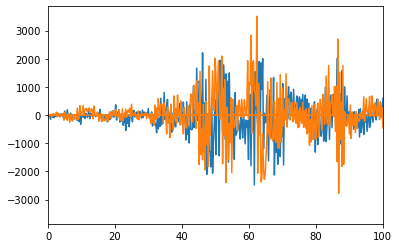

In [31]:
plt.plot(f1,y1.real)
plt.plot(f1,y1.imag)
plt.xlim([0,100])

**Plot s2 FFT: imaginary and real parts**

(0.0, 100.0)

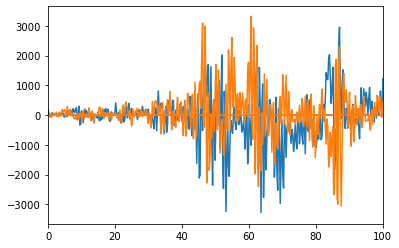

In [32]:
plt.plot(f2,y2.real)
plt.plot(f2,y2.imag)
plt.xlim([0,100])

(0.0, 100.0)

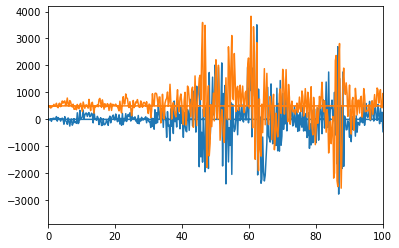

In [33]:
plt.plot(f1,y1.imag)
plt.plot(f2,y2.imag+500)
plt.xlim([0,100])